In [1]:
!pip install imblearn



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.12.0-py3-none-any.whl (257 kB)


In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm, metrics
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.utils import class_weight
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from  sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score


DATA PREPARATION PROCESS 

In [3]:
data1 = pd.read_csv("Loan_Default.csv")
data1.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [5]:
data1.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [6]:
data1.columns = data1.columns.str.lower()
data1.columns


Index(['id', 'year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

DATA ENCODING PROCESS

In [7]:
# Encoding my categoprical variables 
label_encoder = preprocessing.LabelEncoder()
data1['loan_limit']= label_encoder.fit_transform(data1['loan_limit'])
data1['gender']= label_encoder.fit_transform(data1['gender'])
data1['loan_type']= label_encoder.fit_transform(data1['loan_type'])
data1['approv_in_adv']= label_encoder.fit_transform(data1['approv_in_adv'])
data1['loan_purpose']= label_encoder.fit_transform(data1['loan_purpose'])
data1['credit_worthiness']= label_encoder.fit_transform(data1['credit_worthiness'])
data1['open_credit']= label_encoder.fit_transform(data1['open_credit'])
data1['business_or_commercial']= label_encoder.fit_transform(data1['business_or_commercial'])
data1['neg_ammortization']= label_encoder.fit_transform(data1['neg_ammortization'])
data1['interest_only']= label_encoder.fit_transform(data1['interest_only'])
data1['lump_sum_payment']= label_encoder.fit_transform(data1['lump_sum_payment'])
data1['occupancy_type']= label_encoder.fit_transform(data1['occupancy_type'])
data1['construction_type']= label_encoder.fit_transform(data1['construction_type'])
data1['secured_by']= label_encoder.fit_transform(data1['approv_in_adv'])
data1['total_units']= label_encoder.fit_transform(data1['total_units'])
data1['credit_type']= label_encoder.fit_transform(data1['credit_type'])
data1['co-applicant_credit_type']= label_encoder.fit_transform(data1['co-applicant_credit_type'])
data1['age']= label_encoder.fit_transform(data1['age'])
data1['submission_of_application']= label_encoder.fit_transform(data1['submission_of_application'])
data1['region']= label_encoder.fit_transform(data1['region'])
data1['security_type']= label_encoder.fit_transform(data1['security_type'])


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  int32  
 3   gender                     148670 non-null  int32  
 4   approv_in_adv              148670 non-null  int32  
 5   loan_type                  148670 non-null  int32  
 6   loan_purpose               148670 non-null  int32  
 7   credit_worthiness          148670 non-null  int32  
 8   open_credit                148670 non-null  int32  
 9   business_or_commercial     148670 non-null  int32  
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  interest_rate_spread       112031 non-null  float64
 13  upfront_charges            10

DATA EXPLORATORY ANALYSIS

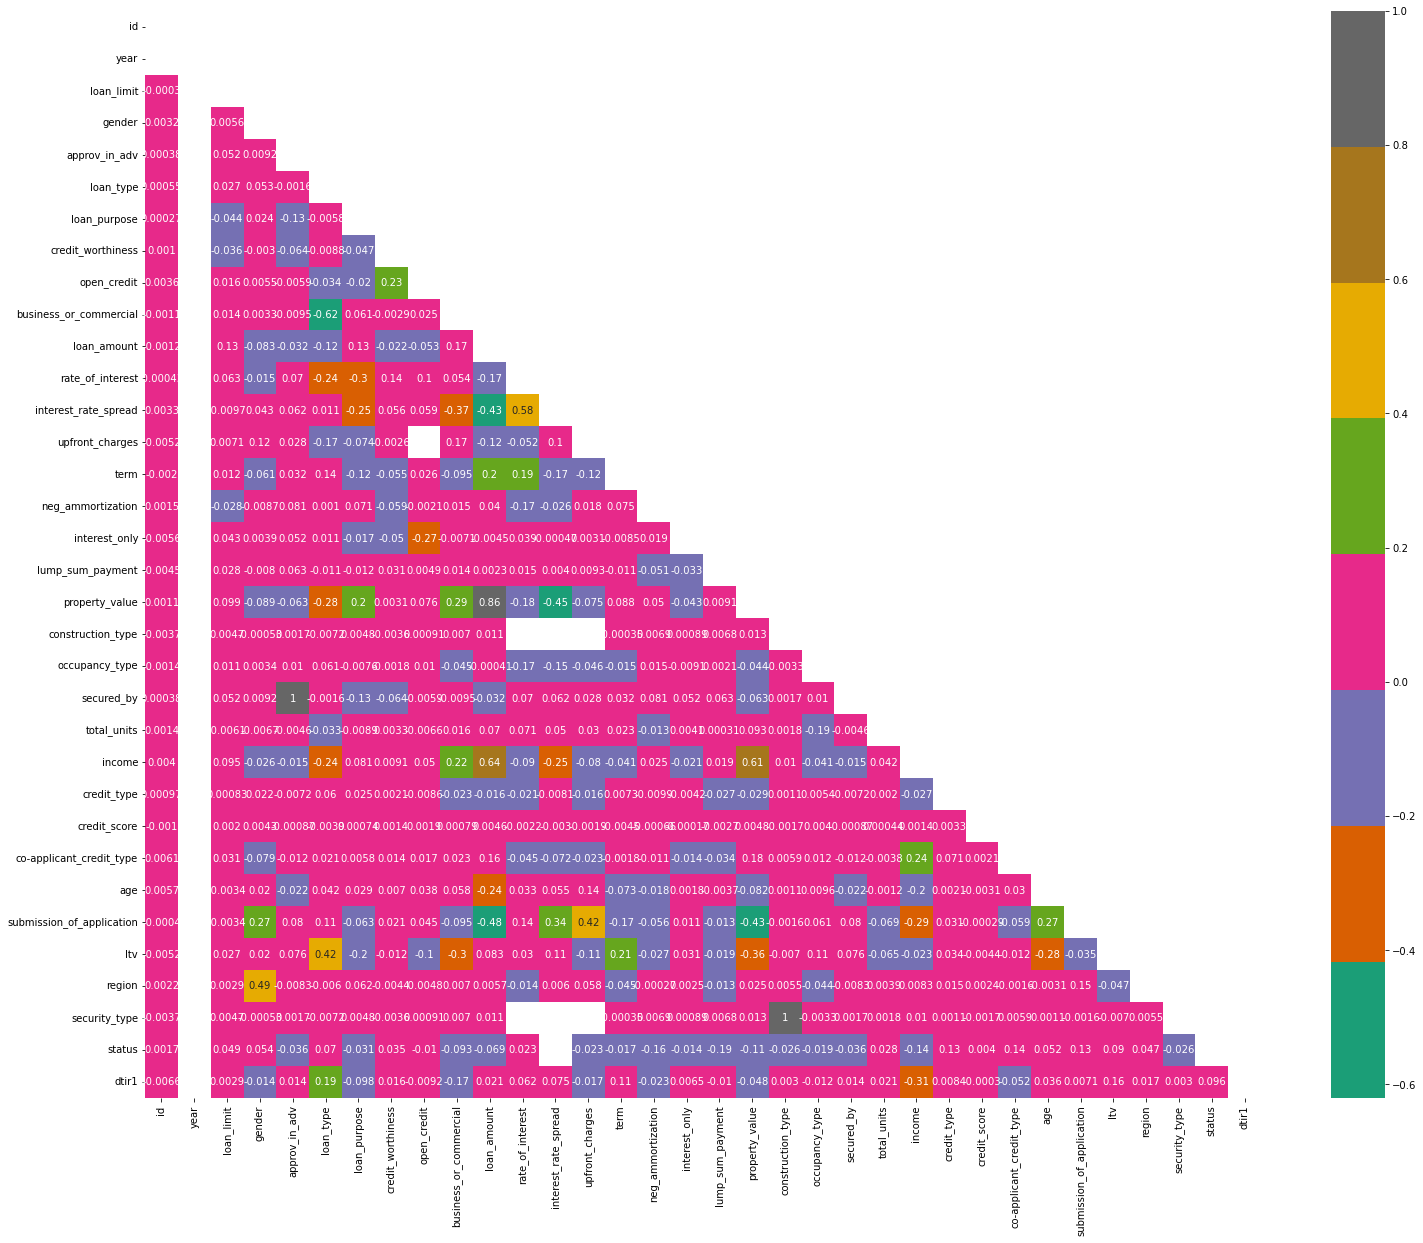

In [9]:
corr=data1.corr(method='spearman')
plt.figure(figsize=(25,20))
sns.heatmap(corr, cmap='Dark2', annot=True, fmt='.2g',
mask=np.triu(corr))
plt.show()


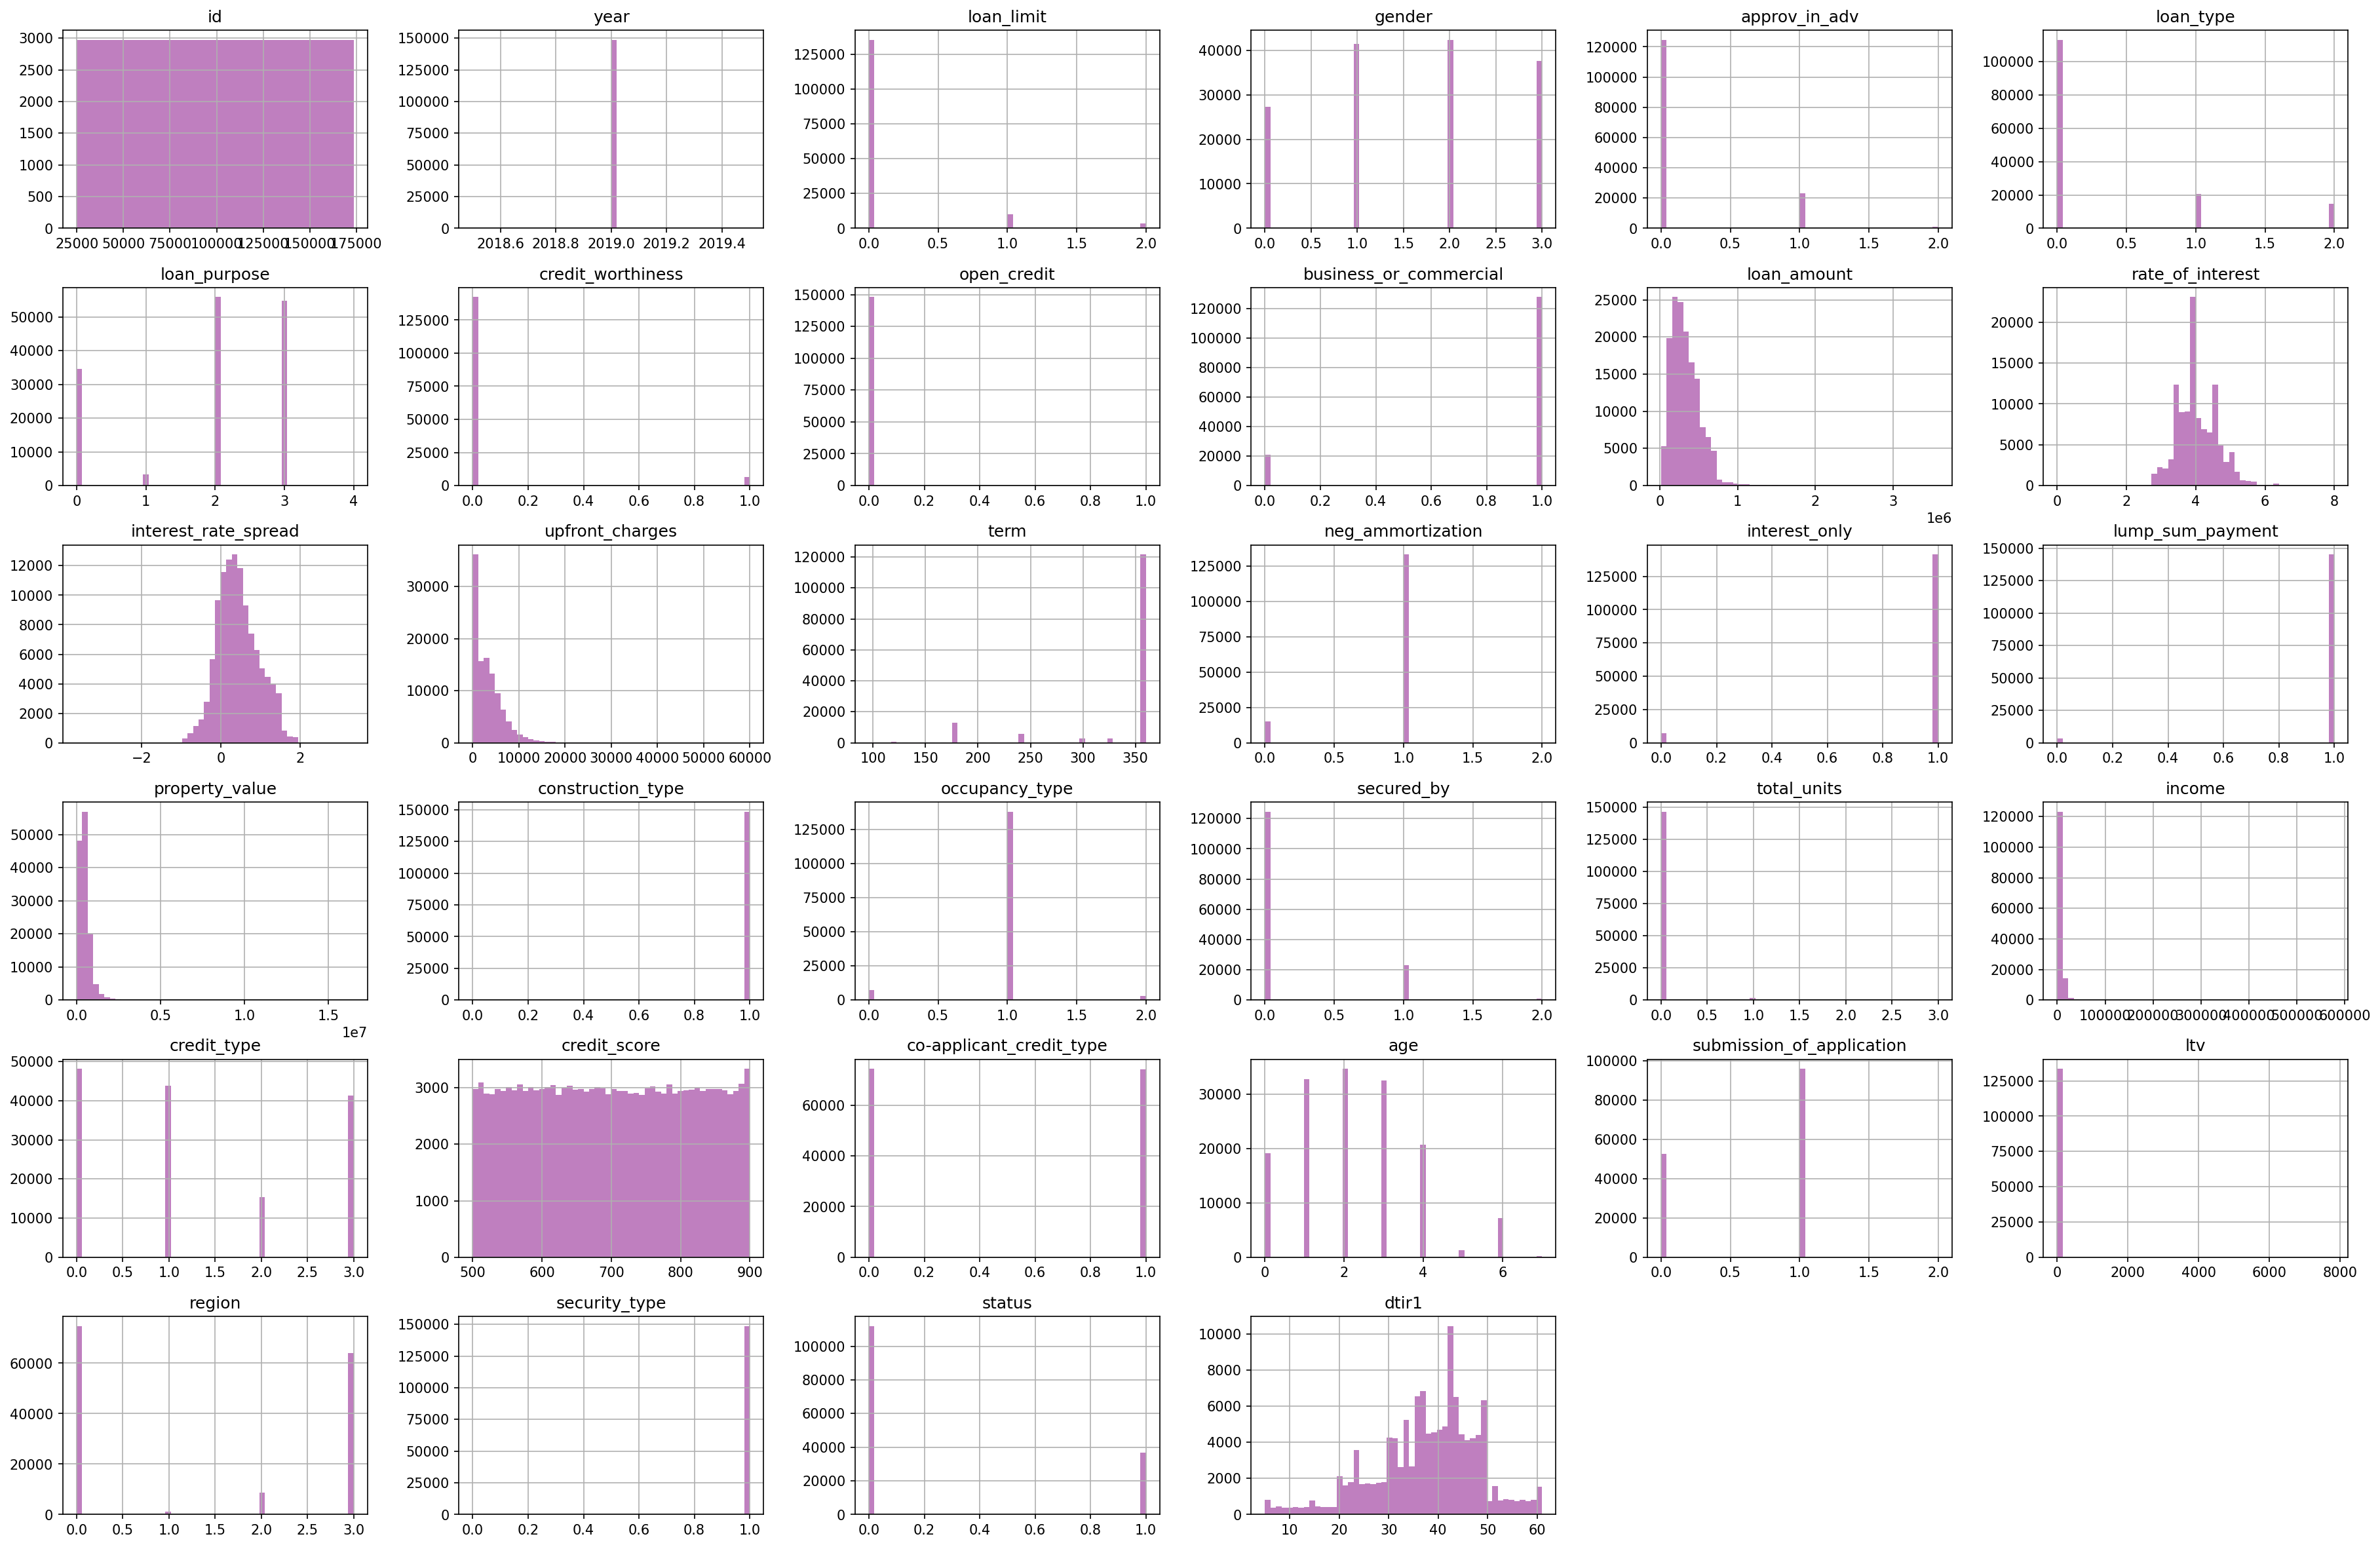

In [10]:
fig,ax=plt.subplots(figsize = (30, 20), dpi = 150)
data1.hist(bins = 50, alpha = 0.5, color='purple', ax=ax)
plt.ylabel('Frequency')
plt.show()

In [11]:
X= data1.drop("status", axis = 1)
Y= data1["status"]

In [12]:
#from sklearn.feature_selection import mutual_info_classif
#import matplotlib.pyplot as plt
#%matplotlib inline
#importances = mutual_info_classif(X,Y)
#feat_importances = pd.Series(importances,data1.columns[0:len(data1.columns)-1])
#feat_importances.plot(kind='barh',color='teal')
#plt.show()

In [13]:
# Column Removal 
# To remove columns that may be multicolinearity or non relevant for the model
# ID, YEAR since its just a single year, loan limit, gender, approved in advance open credit, business or commercial, neg ammortization,
# interest only,lump sum payment, construction type, occupancy type, secured by, total units, credit type, co-applicant credit type,
# submission of application, region  and security type

col_drop = ['id', 'year', 'loan_limit','loan_type', 'gender','credit_score', 'credit_worthiness', 'approv_in_adv',  'open_credit', 'business_or_commercial', 'neg_ammortization', 'interest_only',
           'lump_sum_payment', 'construction_type', 'occupancy_type', 'secured_by', 'total_units', 'co-applicant_credit_type', 
           'submission_of_application', 'region', 'term', 'security_type', 'ltv',]

In [14]:
data1.drop(col_drop, axis = 1, inplace = True)

In [15]:
data1.columns

Index(['loan_purpose', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'property_value', 'income',
       'credit_type', 'age', 'status', 'dtir1'],
      dtype='object')

In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_purpose          148670 non-null  int32  
 1   loan_amount           148670 non-null  int64  
 2   rate_of_interest      112231 non-null  float64
 3   interest_rate_spread  112031 non-null  float64
 4   upfront_charges       109028 non-null  float64
 5   property_value        133572 non-null  float64
 6   income                139520 non-null  float64
 7   credit_type           148670 non-null  int32  
 8   age                   148670 non-null  int32  
 9   status                148670 non-null  int64  
 10  dtir1                 124549 non-null  float64
dtypes: float64(6), int32(3), int64(2)
memory usage: 10.8 MB


In [17]:
data1['status'].value_counts()

0    112031
1     36639
Name: status, dtype: int64

In [18]:
# checking for duplicate values 
data1.duplicated().sum()


1683

In [19]:
# dropping the duplicated values
data1.drop_duplicates(inplace=True)

In [20]:
data1['status'].value_counts()

0    112031
1     34956
Name: status, dtype: int64

In [21]:
# checking for empty cells in the dataset
data1.isnull().sum()

loan_purpose                0
loan_amount                 0
rate_of_interest        34758
interest_rate_spread    34956
upfront_charges         37959
property_value          13485
income                   9086
credit_type                 0
age                         0
status                      0
dtir1                   22444
dtype: int64

In [22]:
# Filling up empty cells using simple imputer 
# since the nans are in the object and int dataframe, mean or median imputer cannot be used to fill up 
# rather would make use of the most frequent/mode to fill up


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data1[['rate_of_interest', 'interest_rate_spread', 'upfront_charges', 'property_value', 'income', 'dtir1']] = imputer.fit_transform(data1[['rate_of_interest', 'interest_rate_spread', 'upfront_charges', 'property_value', 'income', 'dtir1']])

In [23]:
data1.isna().sum()

loan_purpose            0
loan_amount             0
rate_of_interest        0
interest_rate_spread    0
upfront_charges         0
property_value          0
income                  0
credit_type             0
age                     0
status                  0
dtir1                   0
dtype: int64

EXPLORATORY ANALYSIS AFTER DATA PREPARTION

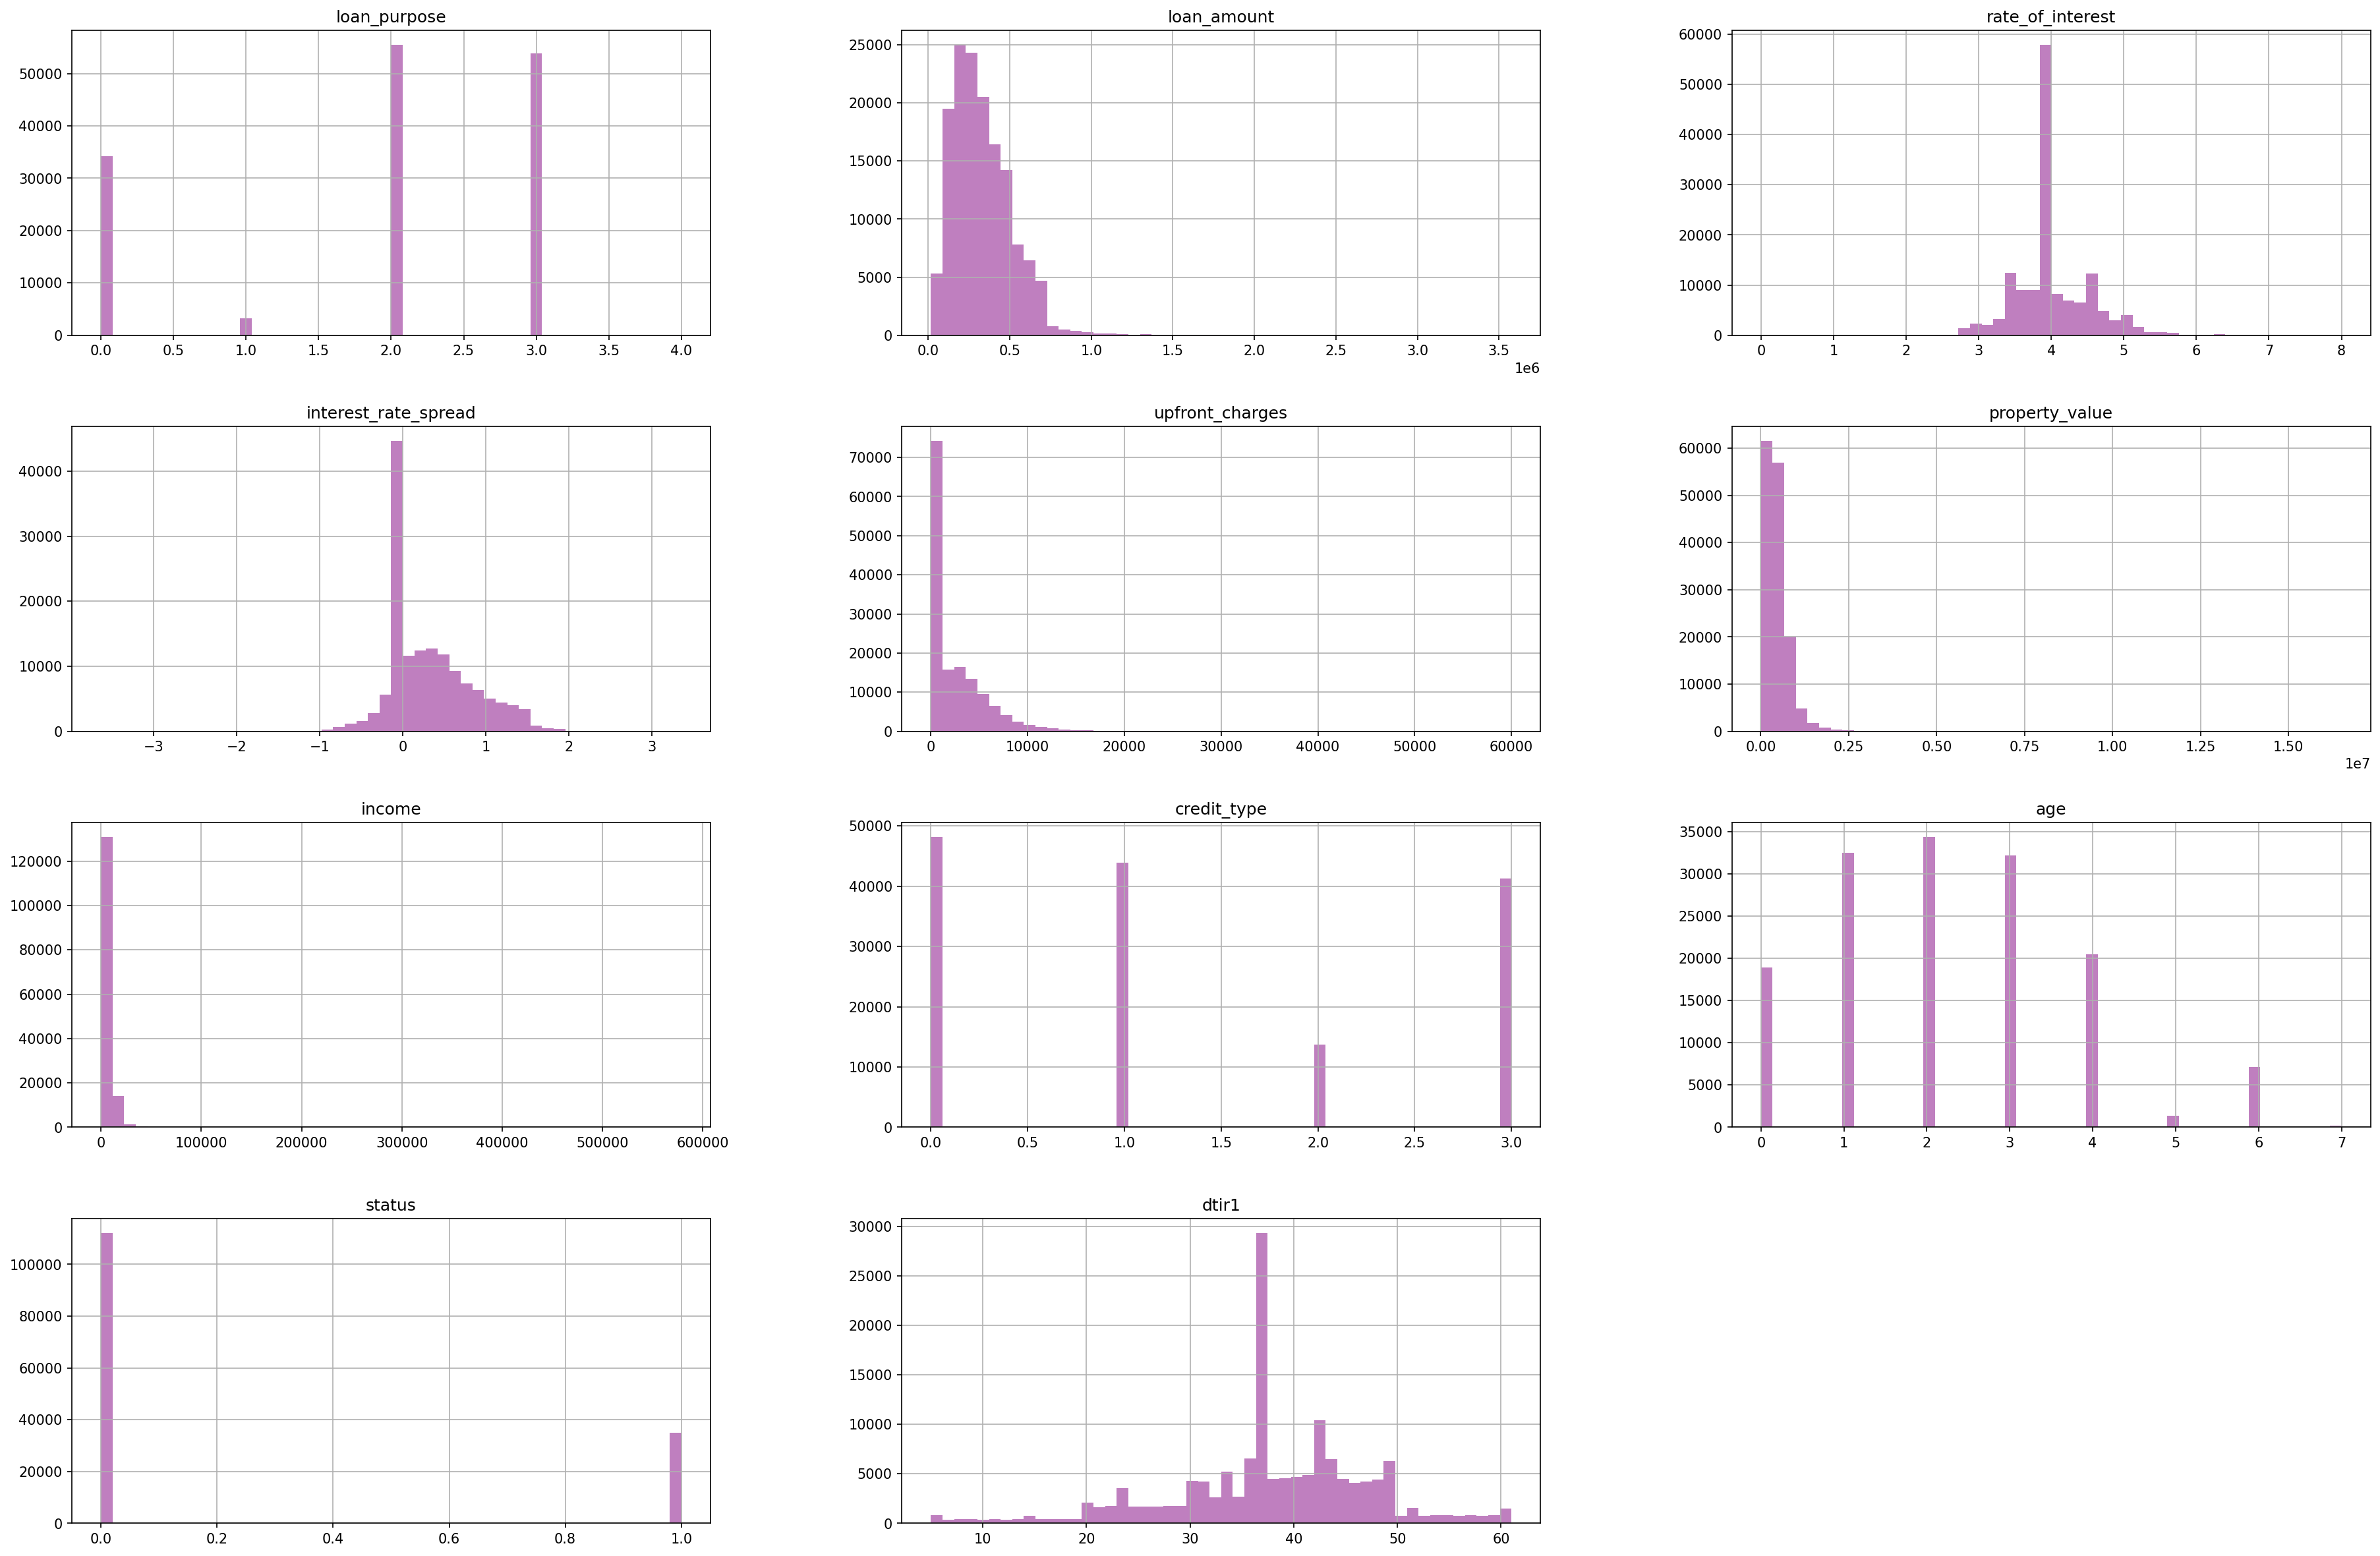

In [24]:
fig,ax=plt.subplots(figsize = (30, 20), dpi = 150)
data1.hist(bins = 50, alpha = 0.5, color='purple', ax=ax)
plt.ylabel('Frequency')
plt.show()

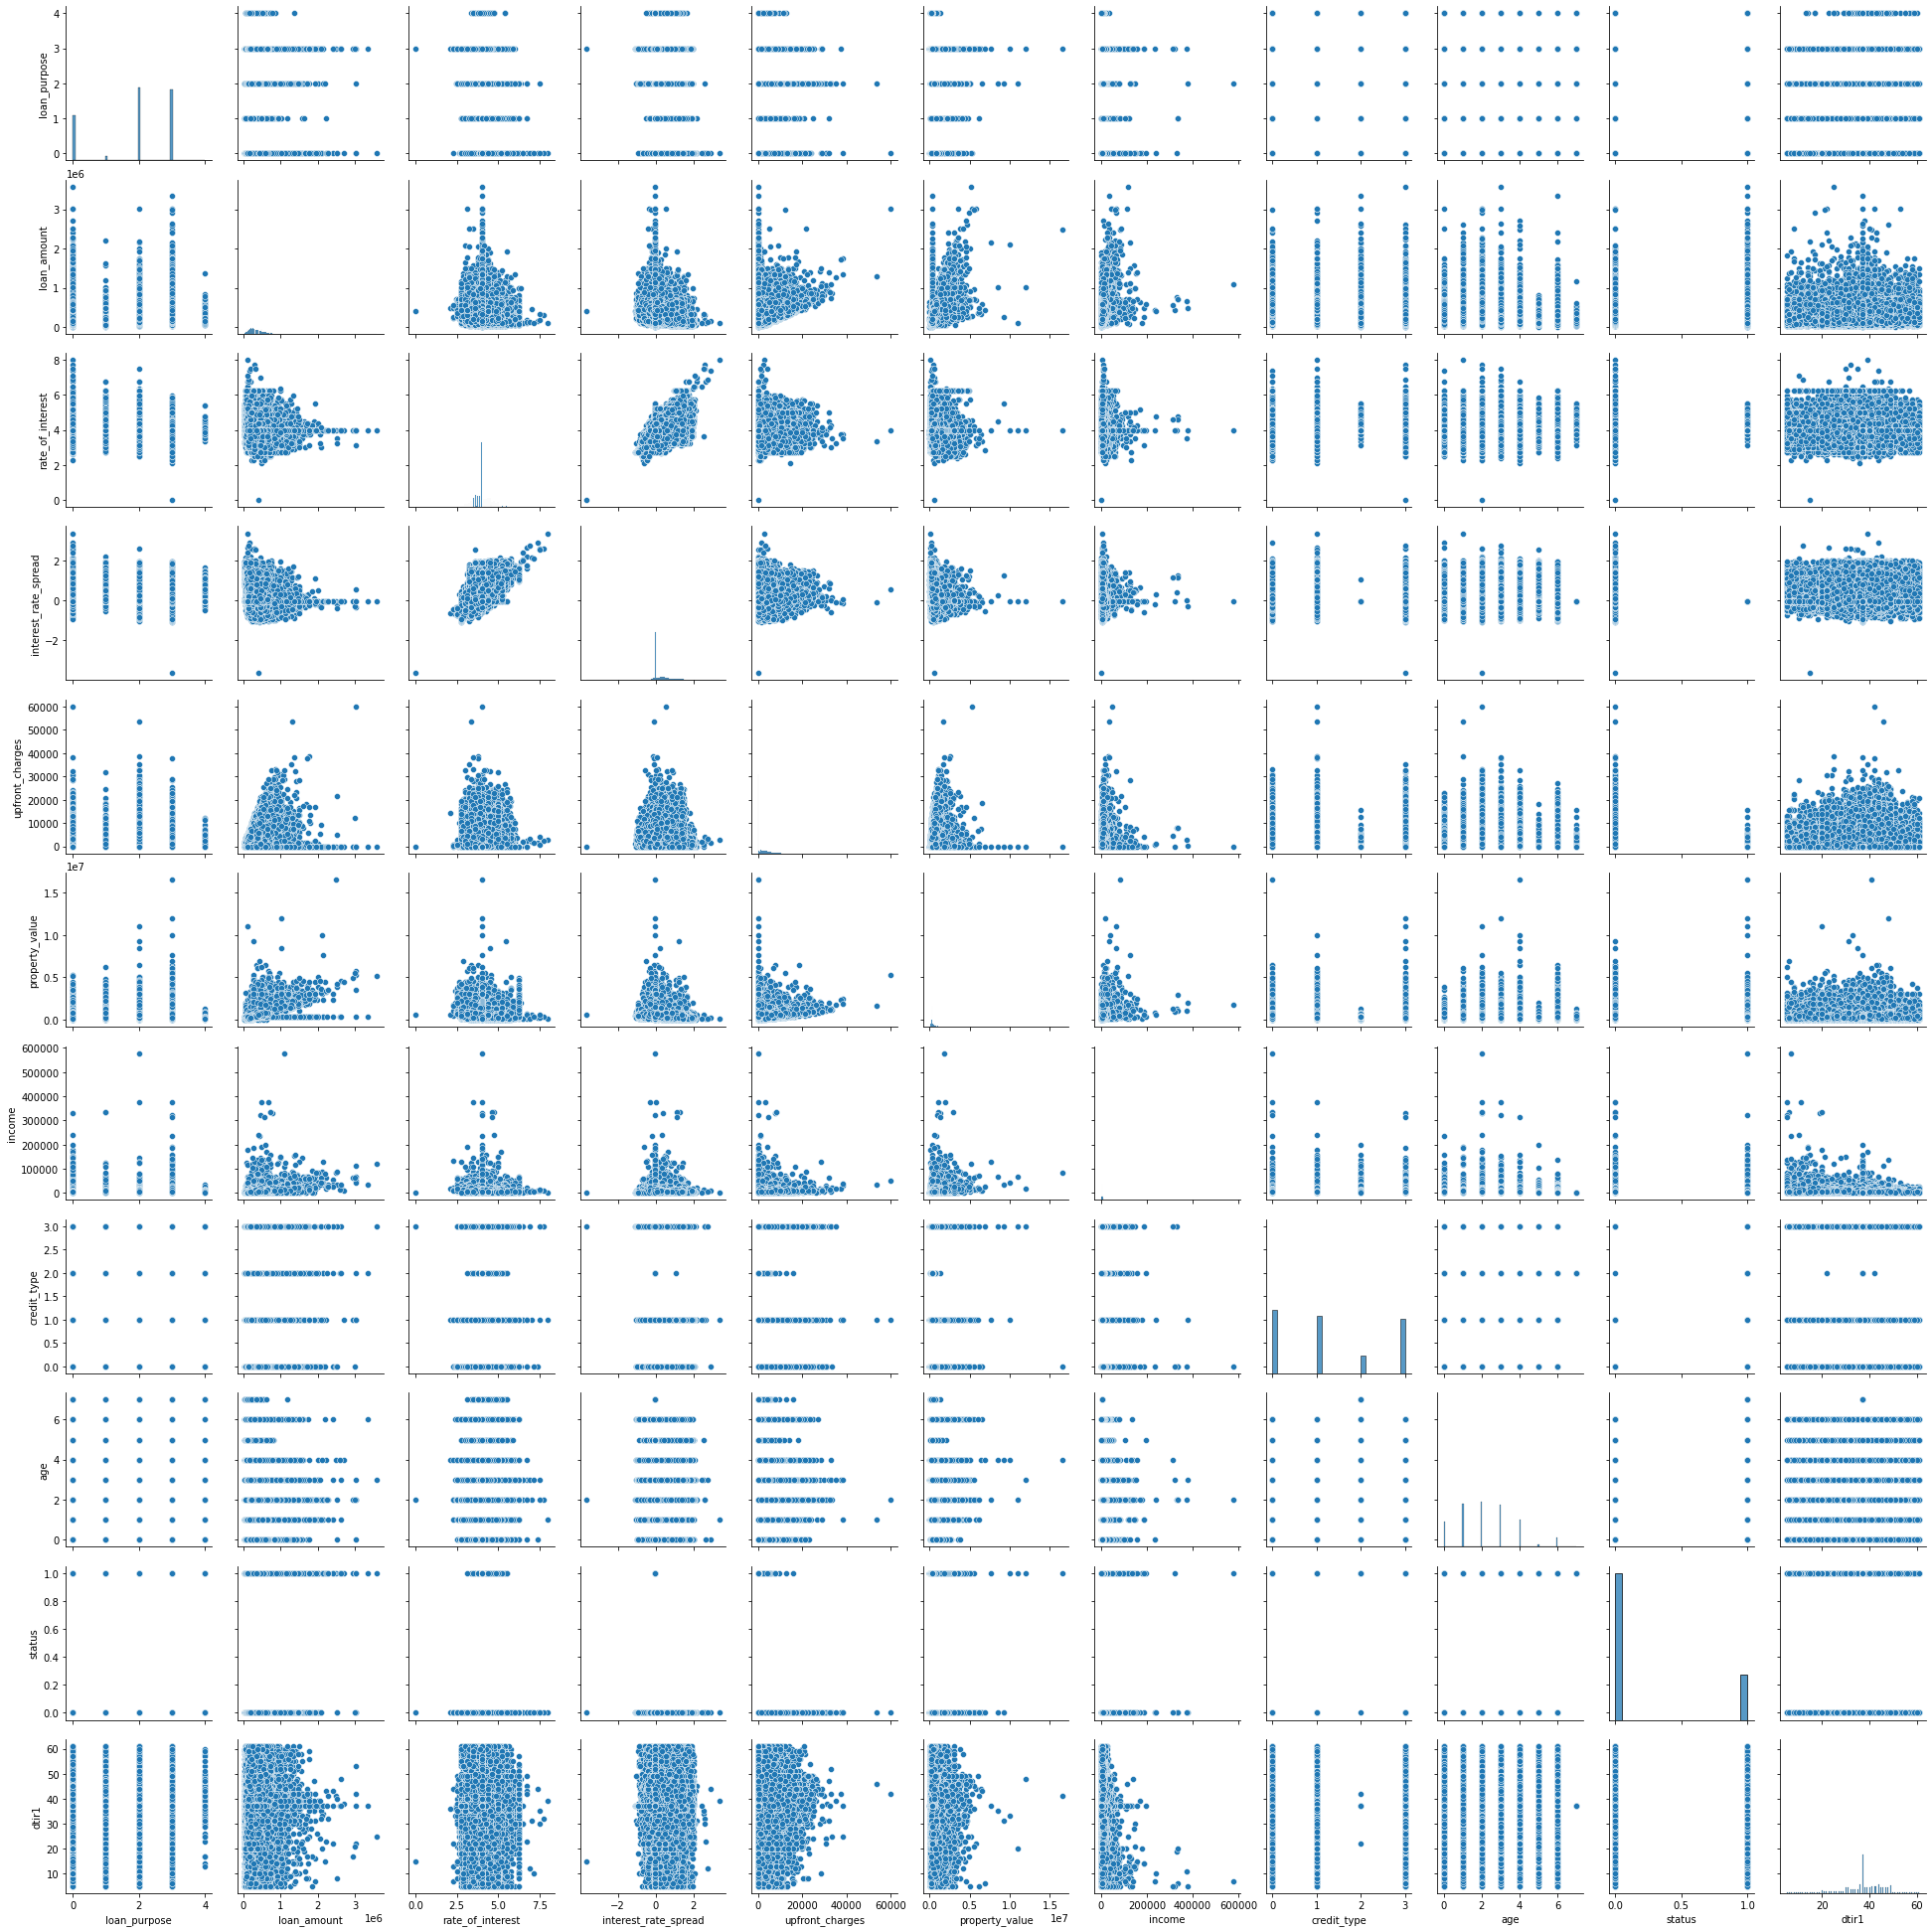

In [25]:
sns.pairplot(data1)

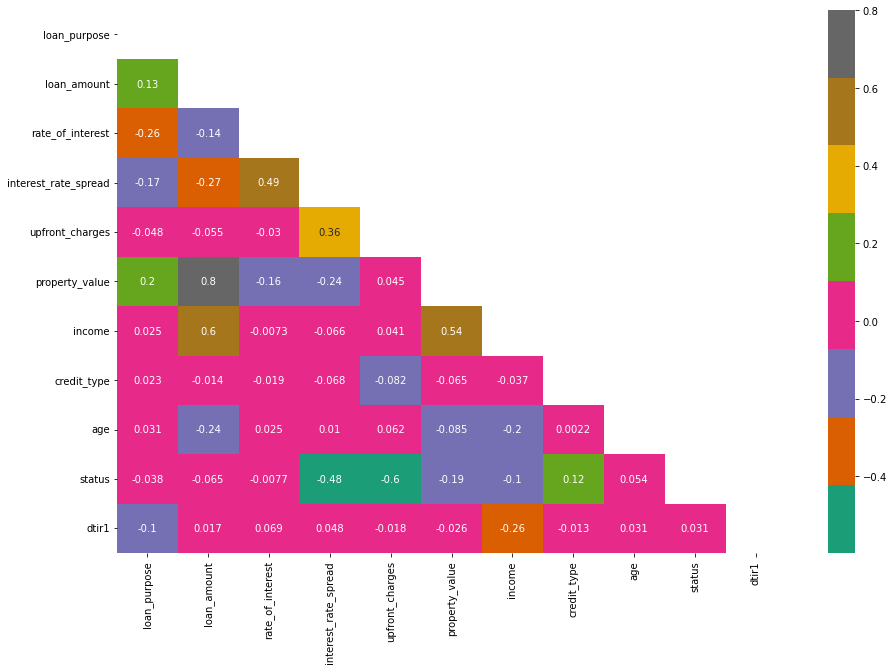

In [26]:
corr=data1.corr(method='spearman')
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='Dark2', annot=True, fmt='.2g',
mask=np.triu(corr))
plt.show()

<AxesSubplot:xlabel='rate_of_interest'>

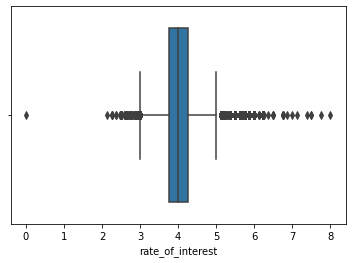

In [27]:
sns.boxplot(data1["rate_of_interest"])

In [28]:
data1 = data1.loc[data1["rate_of_interest"]>1]

<AxesSubplot:xlabel='rate_of_interest'>

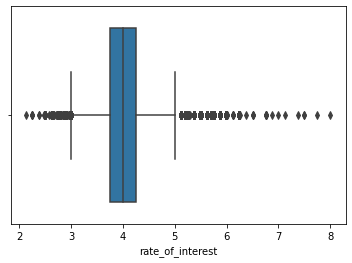

In [29]:
sns.boxplot(data1["rate_of_interest"])

<AxesSubplot:xlabel='upfront_charges'>

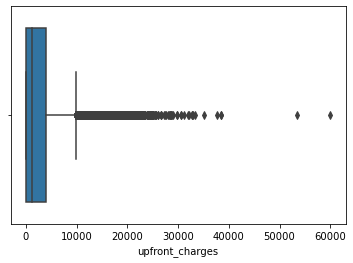

In [30]:
sns.boxplot(data1["upfront_charges"])

In [31]:
data1 = data1.loc[data1["upfront_charges"]<45000]

<AxesSubplot:xlabel='upfront_charges'>

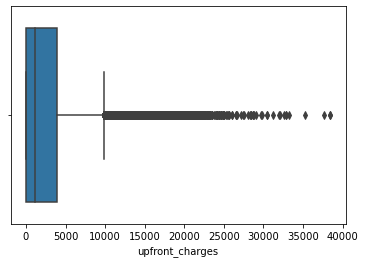

In [32]:
sns.boxplot(data1["upfront_charges"])

<AxesSubplot:xlabel='interest_rate_spread'>

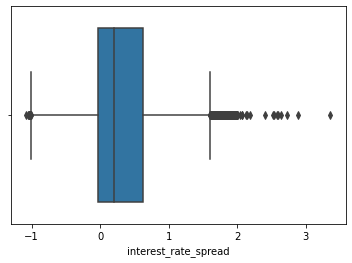

In [33]:
sns.boxplot(data1["interest_rate_spread"])

In [34]:
data1 = data1.loc[data1["interest_rate_spread"]<3]

<AxesSubplot:xlabel='interest_rate_spread'>

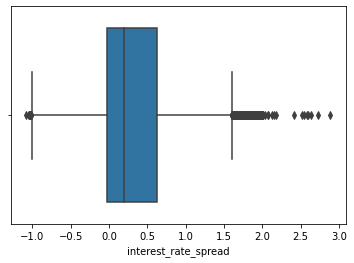

In [35]:
sns.boxplot(data1["interest_rate_spread"])

<AxesSubplot:xlabel='income'>

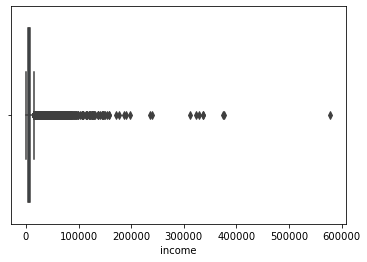

In [36]:
sns.boxplot(data1["income"])

In [37]:
data1 = data1.loc[data1["income"]<450000]

<AxesSubplot:xlabel='income'>

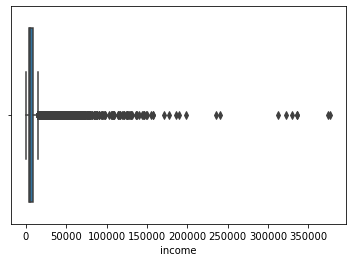

In [38]:
sns.boxplot(data1["income"])

#  Checking some Characteristics of attributes

In [39]:
data1['age'].value_counts()

2    34333
1    32447
3    32173
4    20459
0    18919
6     7117
5     1336
7      198
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

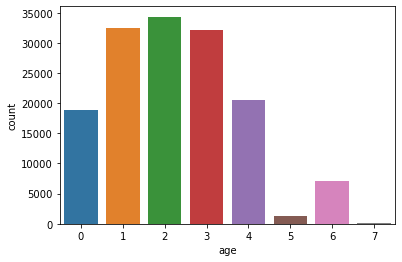

In [40]:
sns.countplot(data=data1, x ="age")

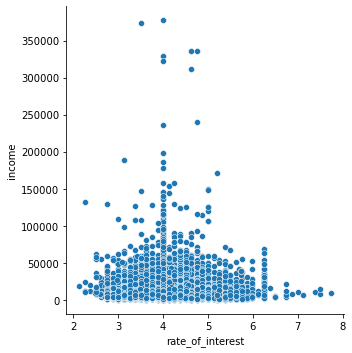

In [41]:
sns.relplot(x ="rate_of_interest", y ="income",data = data1)

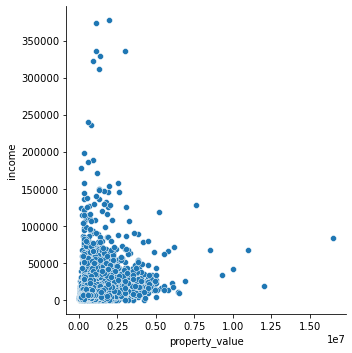

In [42]:
sns.relplot(x ="property_value", y ="income",data = data1)

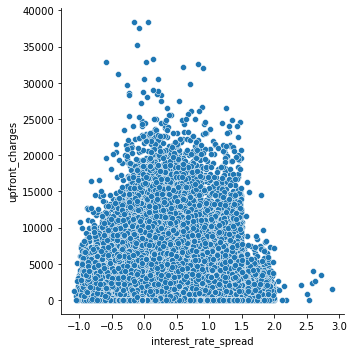

In [43]:
sns.relplot(x ="interest_rate_spread", y ="upfront_charges",data = data1)

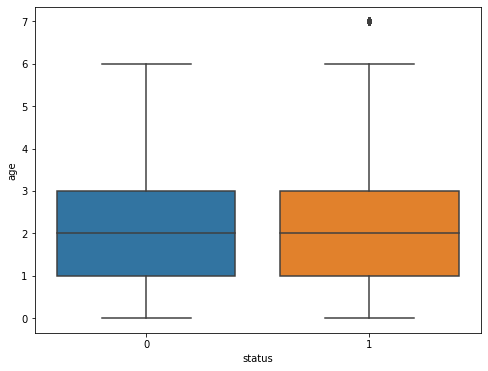

In [44]:
#Checking the properties of some of the variables in respect to the target variable.

fig,ax=plt.subplots()
sns.boxplot(data=data1,x='status',y='age')
fig.set_size_inches([8,6])
plt.show()


<AxesSubplot:xlabel='status', ylabel='count'>

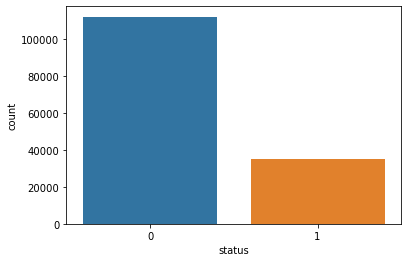

In [45]:
sns.countplot(data=data1 , x='status')

#  

In [46]:
X= data1.drop("status", axis = 1)
Y= data1["status"]

#  SCALLING THE DATASET


In [47]:
scalar = MinMaxScaler().fit(X)

In [48]:
scaled_data = pd.DataFrame(data=scalar.transform(X), columns=X.columns)

In [49]:
scaled_data

,loan_purpose,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,property_value,income,credit_type,age,dtir1
0,0.00,0.028090,0.331556,0.266054,0.000000,0.006667,0.004613,1.000000,0.000000,0.714286
1,0.00,0.053371,0.331556,0.266054,0.000000,0.018182,0.013202,0.666667,0.428571,0.571429
2,0.00,0.109551,0.432889,0.323492,0.015480,0.030303,0.025131,1.000000,0.142857,0.732143
3,0.75,0.123596,0.377778,0.444666,0.000000,0.039394,0.031494,1.000000,0.285714,0.660714
4,0.00,0.191011,0.333333,0.349742,0.000000,0.045455,0.027676,0.333333,0.000000,0.607143
...,...,...,...,...,...,...,...,...,...,...
146977,0.50,0.117978,0.177778,0.337876,0.259122,0.036364,0.020837,0.000000,0.428571,0.767857
146978,0.00,0.160112,0.544889,0.488349,0.000000,0.047273,0.018928,0.000000,0.000000,0.178571
146979,0.75,0.120787,0.177778,0.293664,0.031913,0.043636,0.018292,0.000000,0.285714,0.785714
146980,0.75,0.050562,0.244444,0.419826,0.112477,0.016364,0.018928,1.000000,0.428571,0.428571


#  SPLITTING THE DATA INTO TRAINING AND TESTING

In [50]:
X_train, X_test, Y_train, Y_test= train_test_split(scaled_data, Y, test_size=0.30,random_state=108)
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(102887, 10) (44095, 10) (102887,) (44095,)


In [51]:
Y_train.value_counts()

0    78391
1    24496
Name: status, dtype: int64

<AxesSubplot:xlabel='status', ylabel='count'>

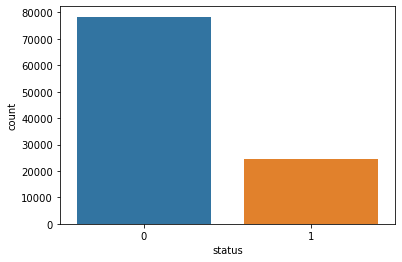

In [52]:
sns.countplot(Y_train)

CREATING A CLASS WEIGHT

In [53]:
class_weights = dict(zip(Y_train.unique(),class_weight.compute_class_weight(class_weight='balanced',classes=Y_train.unique(),y=Y_train)))

In [54]:
class_weights

{0: 0.6562424257886748, 1: 2.100077563683867}

 #  IMPLEMENTING THE MODELS

LOGISTICS REGRESSION MODELS

In [55]:
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)



LogisticRegression()

EVALUATING THE TRAINING DATA

In [56]:
train_pred1 = log_model.predict(X_train)

print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_pred1))
print("Precision on training data:", metrics.precision_score(Y_train, train_pred1))
print("Recall on training data:", metrics.recall_score(Y_train, train_pred1))
print("F1_Score on training data:", metrics.f1_score(Y_train, train_pred1))

Accuracy on training data:  0.9291844450708059
Precision on training data: 0.8085335245607744
Recall on training data: 0.9205584585238407
F1_Score on training data: 0.8609170389035239


EVALUATING THE TESTING DATA

In [57]:
test_pred1=log_model.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred1))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred1))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred1))
print("F1_Score on testing data: ", metrics.f1_score(Y_test, test_pred1))

Accuracy on testing data:  0.9282685111690668
Precision on testing data: 0.8057837384744342
Recall on testing data:  0.9191127258820155
F1_Score on testing data:  0.8587252668721247


TN=31319, FP=2317, FN=846, TP=9613


<Figure size 1440x1080 with 0 Axes>

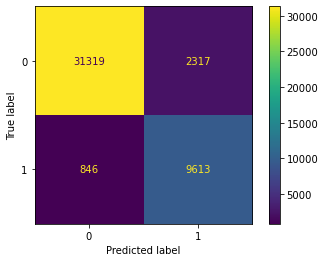

In [58]:
plt.figure(figsize=(20,15))
cm1 = metrics.confusion_matrix(Y_test, test_pred1)
TN, FP, FN, TP = cm1.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.show()



#  Optimization using balance weights for logistics regression

In [59]:
log_model = LogisticRegression(class_weight = class_weights)
log_model.fit(X_train, Y_train)


LogisticRegression(class_weight={0: 0.6562424257886748, 1: 2.100077563683867})

In [60]:
test_pred11=log_model.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred11))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred11))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred11))
print("F1_Score on testing data: ", metrics.f1_score(Y_test, test_pred11))

Accuracy on testing data:  0.900646331783649
Precision on testing data: 0.7082933516106923
Recall on testing data:  0.9880485706090448
F1_Score on testing data:  0.8251027985149109


TN=29380, FP=4256, FN=125, TP=10334


<Figure size 1440x1080 with 0 Axes>

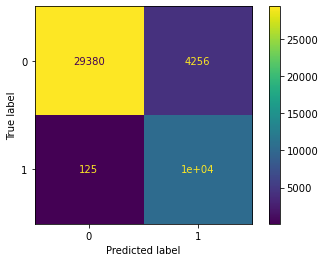

In [61]:
plt.figure(figsize=(20,15))
cm11 = metrics.confusion_matrix(Y_test, test_pred11)
TN, FP, FN, TP = cm11.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm11)
disp.plot()
plt.show()



#  Hyperparameter optimization for logistics regression

In [62]:
#DEFINING PARAMETERS
param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2'],"class_weight":[class_weights]}


In [63]:
#CREATING 5 FOLDS
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 108)
#GRIDSEARCH HYPERPARAMETER TUNING
log_model2= GridSearchCV(estimator= log_model,param_grid=param,scoring="f1",cv=folds,return_train_score=True)
log_model2.fit(X_train,Y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=108, shuffle=True),
             estimator=LogisticRegression(class_weight={0: 0.6562424257886748,
                                                        1: 2.100077563683867}),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'class_weight': [{0: 0.6562424257886748,
                                           1: 2.100077563683867}],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='f1')

In [64]:
# PRINTING THE BEST PARAMETERS

In [65]:
print("Best F1 score: ", log_model2.best_score_)
print("Best hyperparameters: ", log_model2.best_params_)


Best F1 score:  0.8560940639170482
Best hyperparameters:  {'C': 20, 'class_weight': {0: 0.6562424257886748, 1: 2.100077563683867}, 'penalty': 'l2'}


In [66]:
#REFITING THE MODEL WITH THE NEW PARAMETERS
log_model2=LogisticRegression(class_weight=class_weights,C=20,penalty="l2")
log_model2.fit(X_train,Y_train)

LogisticRegression(C=20,
                   class_weight={0: 0.6562424257886748, 1: 2.100077563683867})

#   REBUILDING THE MODEL WITH OPTIMAL VALUES OF PARAMETERS

In [67]:
test_pred11=log_model2.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred11))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred11))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred11))
print("F1_Score on testing data: ", metrics.f1_score(Y_test, test_pred11))

Accuracy on testing data:  0.9202177117587028
Precision on testing data: 0.7528597449908925
Recall on testing data:  0.9879529591739172
F1_Score on testing data:  0.8545319219318558


TN=30244, FP=3392, FN=126, TP=10333


<Figure size 1440x1080 with 0 Axes>

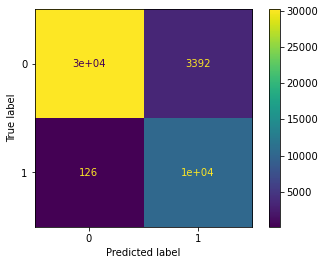

In [68]:
plt.figure(figsize=(20,15))
cm11 = metrics.confusion_matrix(Y_test, test_pred11)
TN, FP, FN, TP = cm11.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm11)
disp.plot()
plt.show()

In [69]:
TP = cm11[0,0]
TN = cm11[1,1]
FP = cm11[0,1]
FN = cm11[1,0]


classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9202
Classification error : 0.0798
Precision : 0.8992
Recall or Sensitivity : 0.9959
True Positive Rate : 0.9959
False Positive Rate : 0.2471
Specificity : 0.7529


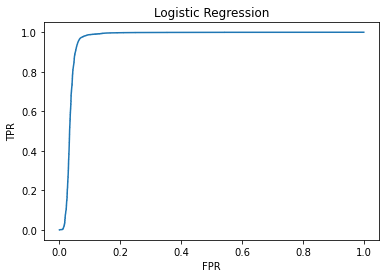

AUC SCORE:0.9627550481081062


In [70]:
cl=[('Logistic Regression',log_model2)]
for clf_name,clf in cl:
    clf.fit(X_train,Y_train)
    test_pred1_proba=clf.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds=roc_curve(Y_test,test_pred1_proba)
    plt.plot(fpr,tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(clf_name)
    plt.show()
    print(f'AUC SCORE:{roc_auc_score(Y_test,test_pred1_proba)}')
    
    
    

#  RANDOM FOREST MODEL IMPLEMENTATION



In [71]:
mdl=RandomForestClassifier(n_estimators=10,n_jobs=-1, min_samples_leaf = 0.01, random_state=108)
mdl.fit(X_train,Y_train)


RandomForestClassifier(min_samples_leaf=0.01, n_estimators=10, n_jobs=-1,
                       random_state=108)

In [72]:
train_pred2 = mdl.predict(X_train)

print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_pred2))
print("Precision on training data:", metrics.precision_score(Y_train, train_pred2))
print("Recall on training data:", metrics.recall_score(Y_train, train_pred2))
print("f1_score on training data:", metrics.f1_score(Y_train, train_pred2))

Accuracy on training data:  0.9983185436449697
Precision on training data: 0.9937878111169759
Recall on training data: 0.9991835401698237
f1_score on training data: 0.9964783715012723


In [73]:
test_pred2=mdl.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred2))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred2))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred2))
print("f1_score on testing data:", metrics.f1_score(Y_test, test_pred2))

Accuracy on testing data:  0.9985032316589183
Precision on testing data: 0.9948576326064185
Recall on testing data:  0.9988526627784683
f1_score on testing data: 0.9968511450381679


TN=33582, FP=54, FN=12, TP=10447


<Figure size 1440x1080 with 0 Axes>

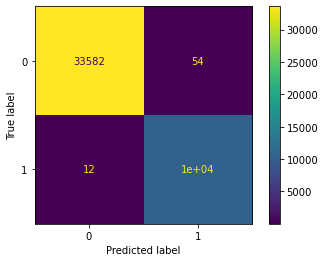

In [74]:
plt.figure(figsize=(20,15))
cm2 = metrics.confusion_matrix(Y_test, test_pred2)
TN, FP, FN, TP = cm2.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()

#  OPTIMIZATION USING THE BALANCED WEIGHTS FOR RANDOM FOREST

In [75]:
mdl2=RandomForestClassifier(n_estimators=10,n_jobs=-1, min_samples_leaf = 0.01, class_weight=class_weights, random_state=108)
mdl2.fit(X_train,Y_train)

RandomForestClassifier(class_weight={0: 0.6562424257886748,
                                     1: 2.100077563683867},
                       min_samples_leaf=0.01, n_estimators=10, n_jobs=-1,
                       random_state=108)

In [76]:
test_pred22=mdl2.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred22))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred22))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred22))
print("f1_score on testing data:", metrics.f1_score(Y_test, test_pred22))

Accuracy on testing data:  0.9990701893638735
Precision on testing data: 0.9964735036218071
Recall on testing data:  0.9996175542594894
f1_score on testing data: 0.9980430528375733


TN=33599, FP=37, FN=4, TP=10455


<Figure size 1440x1080 with 0 Axes>

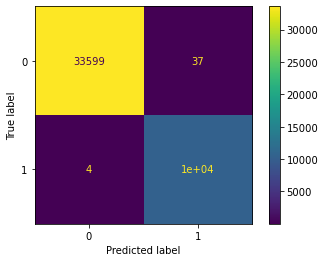

In [77]:
plt.figure(figsize=(20,15))
cm22 = metrics.confusion_matrix(Y_test, test_pred22)
TN, FP, FN, TP = cm22.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm22)
disp.plot()
plt.show()

#  HYPERPARAMETER OPTIMIZATION FOR RANDOM FOREST

In [78]:
min_samples_leaf = [0.001, 0.01, 0.1, 1, 10, 100]
max_features = ["sqrt", "log2"]
n_estimators = [10,20,30,40,50,60,70,80,90,100]


random_grid = {"class_weight":[class_weights],
                'n_estimators': n_estimators,
                'max_features':max_features,
               "min_samples_leaf" : min_samples_leaf
              }


In [79]:
#CREATING 5 FOLDS
folds = StratifiedKFold(n_splits = 2, shuffle = True, random_state = 108)
#GRIDSEARCH HYPERPARAMETER TUNING
mdl2 = GridSearchCV(RandomForestClassifier(random_state=108), random_grid, scoring='f1',cv=folds,n_jobs=-1)
mdl2.fit(X_train,Y_train)





GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=108, shuffle=True),
             estimator=RandomForestClassifier(random_state=108), n_jobs=-1,
             param_grid={'class_weight': [{0: 0.6562424257886748,
                                           1: 2.100077563683867}],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='f1')

#  PRINTING THE BEST PARAMETERS

In [80]:
print("Best F1 score: ", mdl2.best_score_)
print("Best hyperparameters: ", mdl2.best_params_)

Best F1 score:  1.0
Best hyperparameters:  {'class_weight': {0: 0.6562424257886748, 1: 2.100077563683867}, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 30}


#  APPLYING THE HYPERPARAMETER TO RUN THE MODEL

In [81]:
mdl2=RandomForestClassifier(n_estimators=30,n_jobs=-1,max_features = "sqrt",min_samples_leaf = 1, class_weight=class_weights, random_state=108)
mdl2.fit(X_train,Y_train)


RandomForestClassifier(class_weight={0: 0.6562424257886748,
                                     1: 2.100077563683867},
                       max_features='sqrt', n_estimators=30, n_jobs=-1,
                       random_state=108)

In [82]:
test_pred22=mdl2.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred22))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred22))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred22))
print("f1_score on testing data:", metrics.f1_score(Y_test, test_pred22))

Accuracy on testing data:  1.0
Precision on testing data: 1.0
Recall on testing data:  1.0
f1_score on testing data: 1.0


TN=33636, FP=0, FN=0, TP=10459


<Figure size 1440x1080 with 0 Axes>

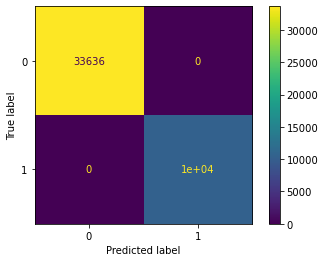

In [83]:
plt.figure(figsize=(20,15))
cm22 = metrics.confusion_matrix(Y_test, test_pred22)
TN, FP, FN, TP = cm22.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm22)
disp.plot()
plt.show()

In [84]:
TP = cm22[0,0]
TN = cm22[1,1]
FP = cm22[0,1]
FN = cm22[1,0]


classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 1.0000
Classification error : 0.0000
Precision : 1.0000
Recall or Sensitivity : 1.0000
True Positive Rate : 1.0000
False Positive Rate : 0.0000
Specificity : 1.0000


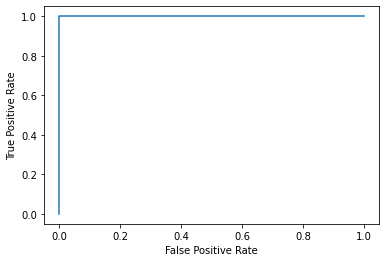

AUC SCORE:1.0


In [85]:
test_pred2_prob=mdl2.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(Y_test,test_pred2_prob)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(f'AUC SCORE:{roc_auc_score(Y_test,test_pred2_prob)}')

#  DECISION TREES MODEL

In [86]:
dt = DecisionTreeClassifier(random_state=108, max_depth = 10, min_samples_leaf = 10, criterion = "gini")
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=108)

In [87]:
train_pred3 = dt.predict(X_train)

print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_pred3))
print("Precision on training data:", metrics.precision_score(Y_train, train_pred3))
print("Recall on training data:", metrics.recall_score(Y_train, train_pred3))
print("F1 on training data:", metrics.f1_score(Y_train, train_pred3))

Accuracy on training data:  0.9999416835946232
Precision on training data: 0.9998775310254735
Recall on training data: 0.9998775310254735
F1 on training data: 0.9998775310254735


In [88]:
test_pred3=dt.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred3))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred3))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred3))
print("F1 on testing data: ", metrics.f1_score(Y_test, test_pred3))

Accuracy on testing data:  0.9999319650754054
Precision on testing data: 1.0
Recall on testing data:  0.9997131656946171
F1 on testing data:  0.9998565622758786


TN=33636, FP=0, FN=3, TP=10456


<Figure size 1440x1080 with 0 Axes>

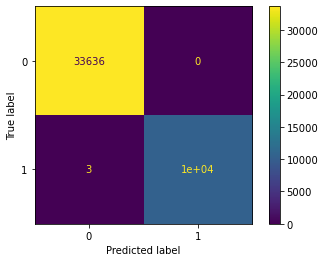

In [89]:
plt.figure(figsize=(20,15))
cm3 = metrics.confusion_matrix(Y_test, test_pred3)
TN, FP, FN, TP = cm3.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot()
plt.show()

#  OPTIMIZATION USING THE BALANCED WEIGHTS FOR DECISION TREES

In [90]:
dt2 = DecisionTreeClassifier(random_state=108,max_depth = 10, min_samples_leaf = 10, criterion = "gini",  class_weight = class_weights)
dt2.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight={0: 0.6562424257886748,
                                     1: 2.100077563683867},
                       max_depth=10, min_samples_leaf=10, random_state=108)

In [91]:
test_pred33=dt2.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred33))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred33))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred33))
print("F1 on testing data: ", metrics.f1_score(Y_test, test_pred33))

Accuracy on testing data:  0.9999092867672071
Precision on testing data: 0.9998087771297447
Recall on testing data:  0.9998087771297447
F1 on testing data:  0.9998087771297447


TN=33634, FP=2, FN=2, TP=10457


<Figure size 1440x1080 with 0 Axes>

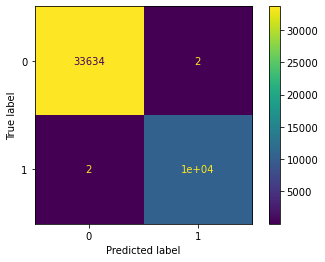

In [92]:
plt.figure(figsize=(20,15))
cm33 = metrics.confusion_matrix(Y_test, test_pred33)
TN, FP, FN, TP = cm33.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm33)
disp.plot()
plt.show()

#  HYPERPARAMETER OPTIMIZATION FOR DECISION TREES

In [93]:
param = {'max_depth':[5, 10, 15, 20],
          'min_samples_leaf':[5, 10, 15, 20],
         "class_weight":[class_weights],
          'criterion':['gini','entropy']}

In [94]:
#CREATING 5 FOLDS
folds = StratifiedKFold(n_splits = 5, shuffle = True )
#GRIDSEARCH HYPERPARAMETER TUNING
dt2 = GridSearchCV(DecisionTreeClassifier(random_state = 108),param_grid=param,cv=folds,n_jobs=-1, verbose=True, scoring='f1')
dt2.fit(X_train,Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=108), n_jobs=-1,
             param_grid={'class_weight': [{0: 0.6562424257886748,
                                           1: 2.100077563683867}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 15, 20]},
             scoring='f1', verbose=True)

In [95]:
print('Best Parameters:',dt2.best_params_,end='\n\n')
print('Best Score:',dt2.best_score_)

Best Parameters: {'class_weight': {0: 0.6562424257886748, 1: 2.100077563683867}, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}

Best Score: 0.9998571282732943


#  APPLYING THE HYPERPARAMETER TO RUN THE MODEL

In [96]:
dt2 = DecisionTreeClassifier(random_state=108,max_depth = 5, min_samples_leaf = 5, criterion = "gini",  class_weight = class_weights)
dt2.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight={0: 0.6562424257886748,
                                     1: 2.100077563683867},
                       max_depth=5, min_samples_leaf=5, random_state=108)

In [97]:
test_pred33=dt2.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred33))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred33))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred33))
print("F1 on testing data: ", metrics.f1_score(Y_test, test_pred33))

Accuracy on testing data:  1.0
Precision on testing data: 1.0
Recall on testing data:  1.0
F1 on testing data:  1.0


TN=33636, FP=0, FN=0, TP=10459


<Figure size 1440x1080 with 0 Axes>

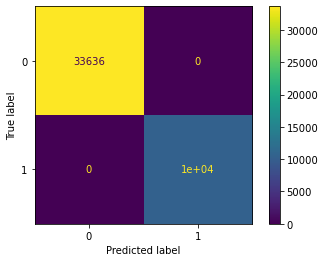

In [98]:
plt.figure(figsize=(20,15))
cm33 = metrics.confusion_matrix(Y_test, test_pred33)
TN, FP, FN, TP = cm33.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm33)
disp.plot()
plt.show()

In [99]:
TP = cm33[0,0]
TN = cm33[1,1]
FP = cm33[0,1]
FN = cm33[1,0]


classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 1.0000
Classification error : 0.0000
Precision : 1.0000
Recall or Sensitivity : 1.0000
True Positive Rate : 1.0000
False Positive Rate : 0.0000
Specificity : 1.0000


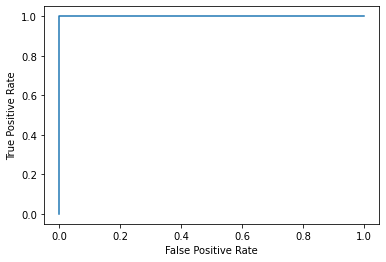

AUC SCORE:1.0


In [100]:
test_pred3_prob=dt2.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(Y_test,test_pred3_prob)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(f'AUC SCORE:{roc_auc_score(Y_test,test_pred3_prob)}')

BAR CHART SHOWING DIFFERENT ALGORITHMS AND THEIR PERFORMANCE

([<matplotlib.axis.XTick at 0x1d887919040>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

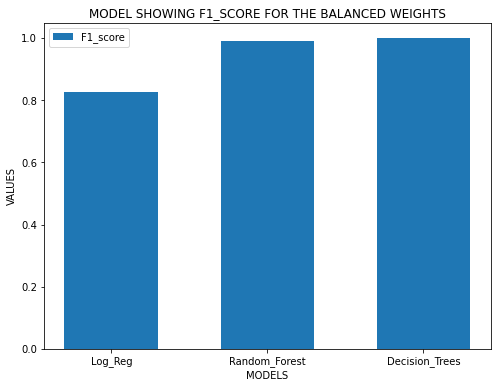

In [101]:
w=0.6
a = ["Log_Reg", "Random_Forest", "Decision_Trees"]

F1_score = [0.825, 0.99, 0.999]

plt.figure(figsize=(8,6))
plt.bar(a,F1_score, w, label="F1_score")


plt.xlabel ("MODELS")
plt.ylabel ("VALUES")
plt.title ("MODEL SHOWING F1_SCORE FOR THE BALANCED WEIGHTS")
plt.legend()
plt.xticks( a)


([<matplotlib.axis.XTick at 0x1d8f7a51eb0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

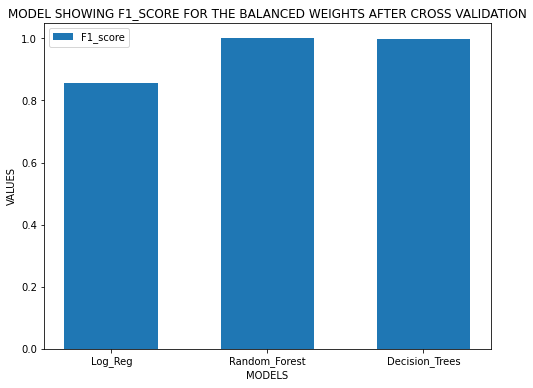

In [102]:
w=0.6
a = ["Log_Reg", "Random_Forest", "Decision_Trees"]

F1_score = [0.856, 1.0, 0.999]

plt.figure(figsize=(8,6))
plt.bar(a,F1_score, w, label="F1_score")


plt.xlabel ("MODELS")
plt.ylabel ("VALUES")
plt.title ("MODEL SHOWING F1_SCORE FOR THE BALANCED WEIGHTS AFTER CROSS VALIDATION")
plt.legend()
plt.xticks(a)